# Analyzing Developer Trends: Insights from Stack Overflow Surveys (2018-2020)

# Introduction


The objective of this project is to analyze and interpret developer trends using the Stack Overflow survey dataset. This analysis aims to provide insights into the developer community, addressing the requirements of a rapidly growing client of our staffing agency that specializes in sourcing qualified candidates for development roles.

## Project Overview

Our client is keen to understand the types of developers available for hire and the general trends within the technology market. To facilitate this, we have access to a comprehensive Stack Overflow dataset, which comprises survey responses from developers worldwide over the past few years. By leveraging this dataset, we will perform a series of statistical analyses to illuminate various aspects of the developer community. These insights will empower our client to make informed decisions regarding their hiring strategies, thereby aligning their growth trajectory with market trends.




# Loading the Data


In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Set the maximum column width to None to see full content 
pd.set_option('display.max_colwidth', None)

In [2]:
# Read the CSV file 

stack_overflow_file_path = 'developer_dataset.csv'

try:
    developer_dataset = pd.read_csv(stack_overflow_file_path)
except FileNotFoundError:
    print(f'Error: the file {stack_overflow_file_path} was not found')

stack_overflow_df = developer_dataset.copy()

/var/folders/ss/_s30b2md5nsgx4nr60qrj4nc0000gn/T/ipykernel_16338/942379579.py:6: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  developer_dataset = pd.read_csv(stack_overflow_file_path)


## Explore data

The dataset has 111,209 entries and 21 columns. Here are the first few rows and an overview of the columns:

	•	RespondentID: Unique identifier for each respondent.
	•	Year: The year the survey was conducted.
	•	Country: The respondent’s country.
	•	Employment: Employment status.
	•	UndergradMajor: Undergraduate major.
	•	DevType: Types of developers.
	•	LanguageWorkedWith: Languages the respondent has worked with.
	•	LanguageDesireNextYear: Languages the respondent wants to work with next year.
	•	DatabaseWorkedWith: Databases the respondent has worked with.
	•	DatabaseDesireNextYear: Databases the respondent wants to work with next year.
	•	PlatformWorkedWith: Platforms the respondent has worked with.
	•	PlatformDesireNextYear: Platforms the respondent wants to work with next year.
	•	Hobbyist: Whether the respondent codes as a hobby.
	•	OrgSize: Size of the organization the respondent works for.
	•	YearsCodePro: Years of professional coding experience.
	•	JobSeek: Whether the respondent is looking for a job.
	•	ConvertedComp: Annual salary in USD.
	•	WorkWeekHrs: Hours worked per week.
	•	NEWJobHunt: Reason for job hunting.
	•	NEWJobHuntResearch: How the respondent searches for new jobs.
	•	NEWLearn: How the respondent learns new technologies.


In [3]:
# Check the DataFrame info:
stack_overflow_df.info()
# Display the first few rows of the dataset
stack_overflow_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111209 entries, 0 to 111208
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RespondentID            111209 non-null  int64  
 1   Year                    111209 non-null  int64  
 2   Country                 111209 non-null  object 
 3   Employment              109425 non-null  object 
 4   UndergradMajor          98453 non-null   object 
 5   DevType                 100433 non-null  object 
 6   LanguageWorkedWith      102018 non-null  object 
 7   LanguageDesireNextYear  96044 non-null   object 
 8   DatabaseWorkedWith      85859 non-null   object 
 9   DatabaseDesireNextYear  74234 non-null   object 
 10  PlatformWorkedWith      91609 non-null   object 
 11  PlatformDesireNextYear  85376 non-null   object 
 12  Hobbyist                68352 non-null   object 
 13  OrgSize                 54804 non-null   object 
 14  YearsCodePro        

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN


# Data Cleaning

### Handling Highly Missing Data

Upon examining the dataset, it is evident that several columns contain a substantial amount of missing data. With such extensive missing data, any statistical analysis performed would likely lack accuracy and fail to represent the developers who participated in the survey adequately. Fortunately, it is a recognized practice to remove columns with approximately 60% or more missing data to ensure the integrity and reliability of the analysis.



In [4]:
# Check for missing values in each column 
missing_data = stack_overflow_df.isnull().sum()
missing_data_percentage = (missing_data / len(stack_overflow_df)) * 100 
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_data_percentage
})

missing_summary_sorted = missing_summary.sort_values(by='Percentage', ascending=False)
# Display the summary of missing data
missing_summary_sorted

,Missing Values,Percentage
NEWJobHuntResearch,92526,83.200101
NEWJobHunt,92082,82.800852
NEWLearn,86983,78.215792
WorkWeekHrs,60120,54.060373
OrgSize,56405,50.719816
JobSeek,50653,45.547573
Hobbyist,42857,38.537349
DatabaseDesireNextYear,36975,33.248208
PlatformDesireNextYear,25833,23.229235
DatabaseWorkedWith,25350,22.794918


Based on the above numbers, it is safe to remove the following columns:
* NEWJobHuntResearch
* NEWJobHunt
* NEWLearn

In [5]:
# Drop the aforementioned columns
stack_overflow_df.drop([
    'NEWJobHuntResearch',
    'NEWJobHunt',
    'NEWLearn',
], axis=1, inplace=True)

### Analysis of Developers by Country

In preparation for the analysis, key questions must be identified to guide the examination of the data. A primary focus will be investigating the distribution of employment status and developer types geographically, specifically by country.

The dataset reveals incomplete data in both the 'Employment' and 'DevType' fields. The extent is relatively minor, with less than 10% missing for each. However, given that these fields are foundational for subsequent analyses, addressing any data gaps is imperative to ensure the accuracy and reliability of the results.

To effectively handle this, a practical approach is to examine the missing data at the country level for each field. This will allow us to identify any patterns or trends that might inform our imputation strategy. Addressing incomplete data in key fields such as 'Employment' and 'DevType' is essential to ensure the integrity of our cross-country comparisons and support data-driven decision-making. By doing so, we can provide our clients with robust and reliable insights into the developer landscape, empowering them to make informed and strategic decisions.

/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


                Total Users
Country                    
Canada                 8979
China                  2072
France                 6861
Germany               16215
Japan                  1049
Mexico                 1918
Spain                  4534
United Kingdom        15854
United States         53727 

Missing Data in `Employment` and `DevType` by Country:

          Country  Employment  DevType
0          Canada         148      944
1           China         139      491
2          France         104      848
3         Germany         386     1691
4           Japan          13      109
5          Mexico          25      207
6           Spain          74      434
7  United Kingdom         196     1472
8   United States         699     4580 



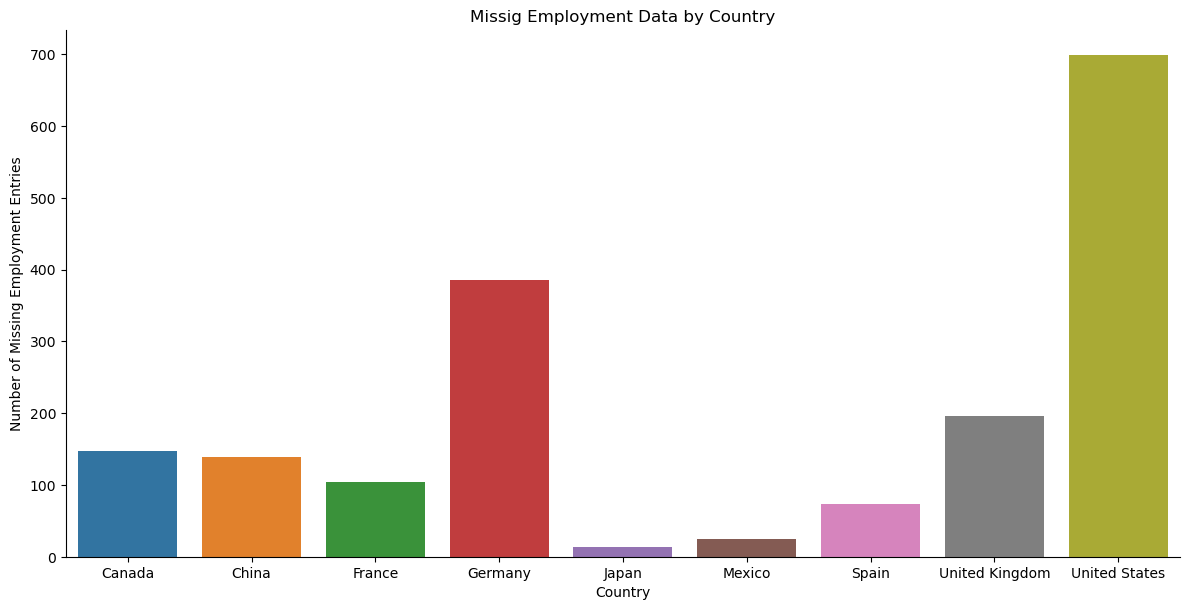

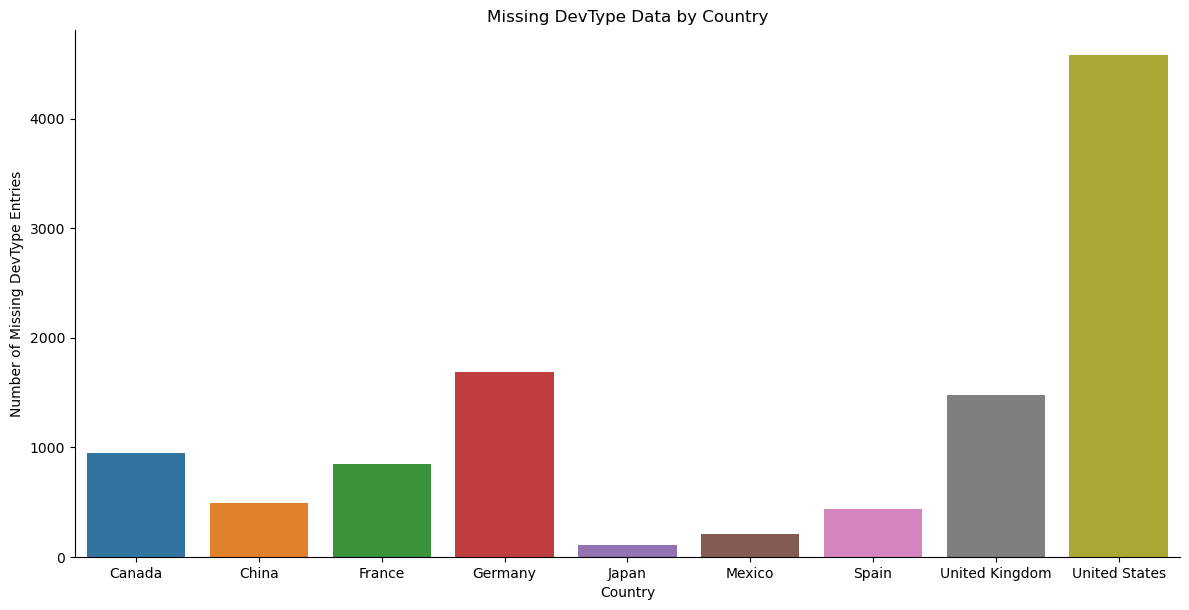

In [6]:
# Group the dataset by 'Country' and count the number of respondents for each country
country_counts = stack_overflow_df[[
    'RespondentID', 'Country'
]].groupby('Country').count().rename(columns={'RespondentID' : 'Total Users'})

print(country_counts,'\n')

#print(country_counts,'\n')

# Identify missing data in 'Employment' and 'DevType' columns, group by 'Country', and sum the missing values
missingData = stack_overflow_df[[
    'Employment', 'DevType'
]].isnull().groupby(stack_overflow_df['Country']).sum().reset_index()

print('Missing Data in `Employment` and `DevType` by Country:\n')
print(missingData,'\n')


# Plot the number of missing 'Employment' entries for each country 
A = sns.catplot(
    data=missingData, kind='bar', # Specify the dataset and plot type
    x='Country', y='Employment',  # Define the x and y axes
    height=6, aspect=2            # Set the size and aspect ratio of the plot
)
# Label the axes
A.set_xlabels('Country') # Label the x-axis
A.set_ylabels('Number of Missing Employment Entries') # Label the y-axis
plt.title('Missig Employment Data by Country')

# Plot the number of missing 'DevType' entries for each country
B = sns.catplot(
    data=missingData, kind='bar', # Specify the dataset and plot type
    x='Country', y='DevType',    # Define the x and y axes
    height=6, aspect=2            # Set the size and aspect ratio of the plot
)
B.set_axis_labels('Country', 'Number of Missing DevType Entries') # Label the axes
plt.title('Missing DevType Data by Country')

# Display the plots
plt.show()


As observed in the plots above, the missing data does not appear to be significantly higher for any particular country. Using domain knowledge, it is understood that the extent of missing data correlates with the relative size of the respondent population in each country. For instance, there is more missing data in the United States compared to Japan due to a higher number of respondents. Similarly, it is noted that the United States and Germany have a significantly larger average number of developers than other countries, which explains the higher count of missing data points in these countries.

Based on this analysis, it is determined that the missing data for the ‘Employment’ and ‘DevType’ columns can be classified as Missing Completely at Random (MCAR). This classification indicates that the missing data is not related to any specific variable in the dataset and can thus be safely removed without introducing bias. Therefore, rows with missing data in these columns can be deleted to maintain the integrity of the dataset.

In [13]:
# Remove rows with missing values in either 'Employment' or 'DevType' columns.\
stack_overflow_df.dropna(subset=[
    'Employment', 'DevType'
], inplace=True, how='any')


Now, the distribution of employment and developer types by country can be analyzed. The next step involves aggregating the employment data by key developer roles that correspond to significant stages of the development lifecycle. These roles include:

- Front-end Development
- Back-end Development
- Full-stack Development
- Mobile Development
- Administrative Roles

Aggregating employment data by key developer roles is essential to our analysis as it offers a detailed and structured perspective of the developer workforce. This methodology enables us to deliver insights that are vital for comprehending market demand, formulating targeted recruitment strategies, efficiently allocating resources, identifying industry trends, and addressing the specific needs of our client. By aligning our analysis with the significant stages of the development lifecycle, we ensure a comprehensive and actionable understanding of the developer landscape.

### Visualizing the Distribution of Employment Statuses and Developer Roles by Country

/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


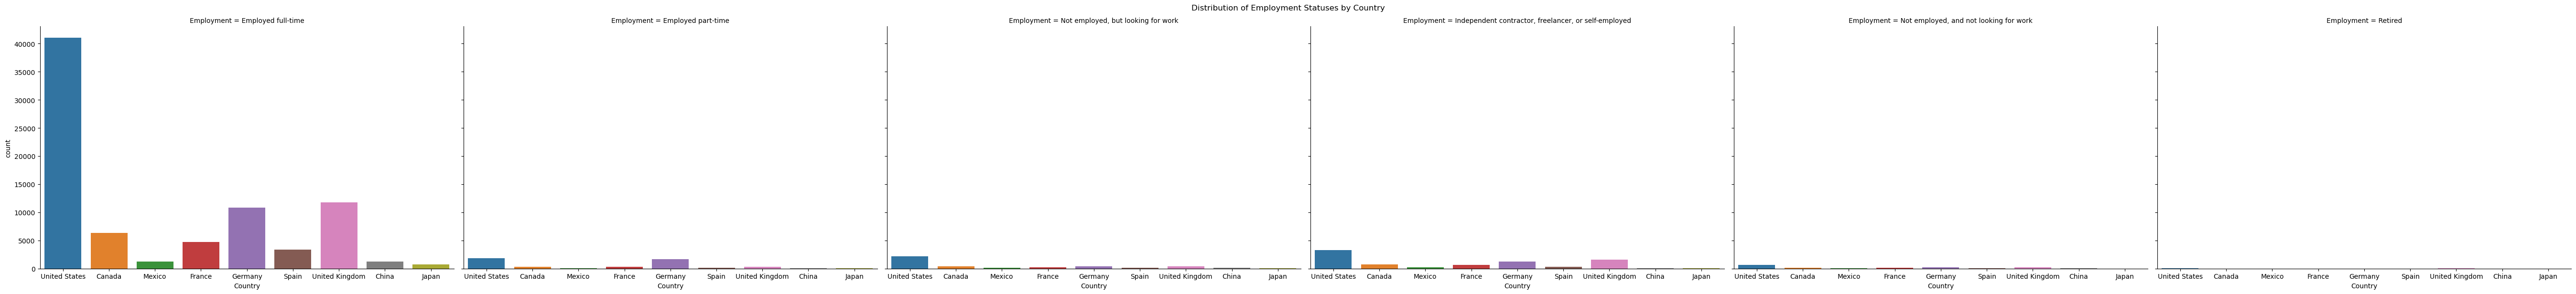

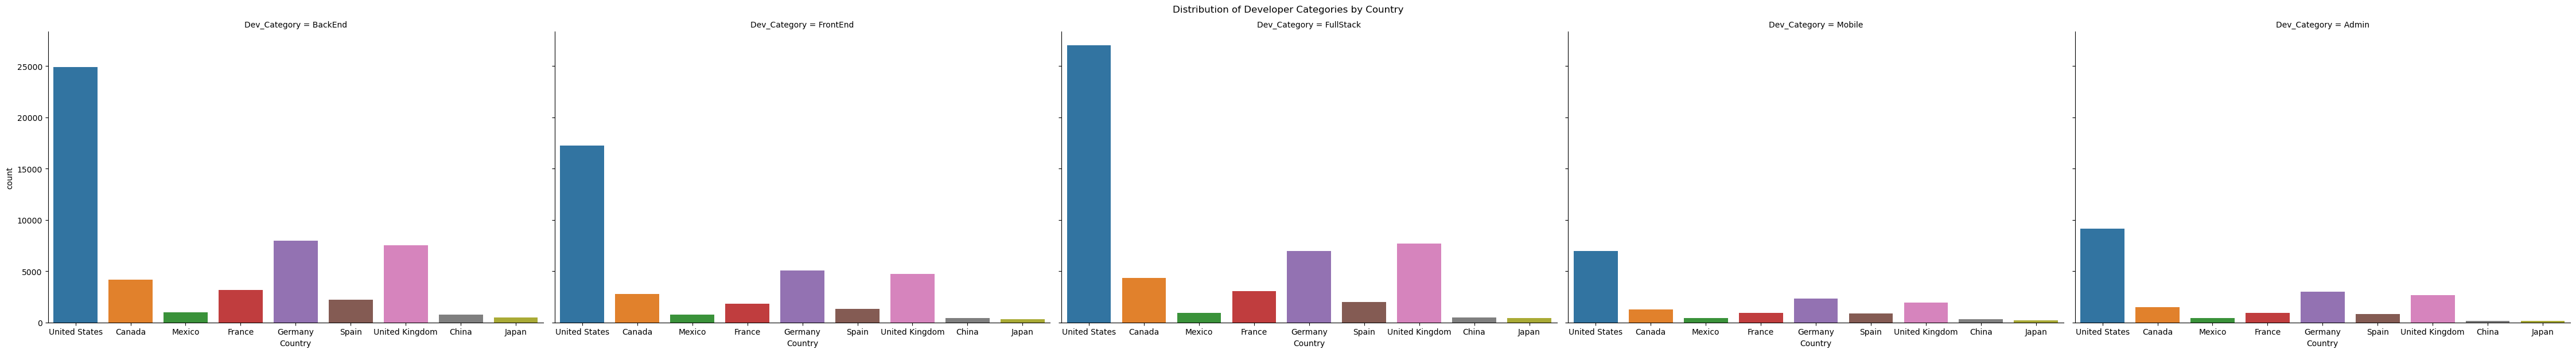

In [61]:
# Visualize the distribution of employment statuses by country 
country_employment_plot = sns.catplot(x='Country', col='Employment',
                                     data=stack_overflow_df, kind='count',
                                     height=6, aspect=1.5)
# Set the title for the employment plot
country_employment_plot.fig.suptitle('Distribution of Employment Statuses by Country', y=1.02)

# Extract the relevant columns for developer types
dev_df = stack_overflow_df[['Country', 'DevType']].copy().reset_index() # Use .copy() to avoid SettingWithCopyWarning

# Define a mapping of columns to their corresponding keywords.
dev_type_map = {
    'BackEnd': 'back-end',
    'FrontEnd': 'front-end',
    'FullStack': 'full-stack',
    'Mobile': 'mobile',
    'Admin': 'administrator'
}

# Initialize the specified columns to False
for column in dev_type_map.keys():
    dev_df[column] = False

# Iterate over the dictionary items.
for column, value in dev_type_map.items():
    # Create a mask to filter for rows containing the specific developer type
    mask = dev_df['DevType'].str.contains(value, case=False, na=False)
    # Assign True to the corresponding column where the mask is True.
    dev_df.loc[mask, column] = True

# Reshape the DataFrame from wide to long format 
dev_df_long = dev_df.melt(
    id_vars=['Country'], # 'Country' column will not be unpivoted and will be kept as the identifiers/
    value_vars=[
        'BackEnd', 'FrontEnd', 'FullStack', 'Mobile', 'Admin' # These are the columns that contain the values to be unpivoted into rows
    ],
    var_name='Dev_Category', # The name of the new column that will hold the original column names from `value_vars`.
    value_name='has_skill' # The name of the new column that will hold the values from the original columns
)

dev_df_long = dev_df_long[dev_df_long['has_skill']== True].reset_index(drop=True)


# Visualize the distribution of developer categories by country
dev_category_plot = sns.catplot(x='Country', col='Dev_Category',
                    data=dev_df_long, kind='count',
                    height=6, aspect=1.5)

# Set the title for the developer plot
dev_category_plot.fig.suptitle('Distribution of Developer Categories by Country', y=1.02)

plt.show()

##### Note: Double-click on images to enlarge them.

### Analysis of the Distribution of Employment Statuses by Country

The first set of plots, titled "Distribution of Employment Statuses by Country," provides insights into the employment status of developers across various countries. The employment statuses analyzed include Full-time, Part-time, Not employed (but looking for work), Not employed (and not looking for work), Independent contractor/freelancer/self-employed, and Retired. The analysis highlights the following observations:

1. **Employed Full-time**:
   - The United States has the highest number of full-time employed developers by a significant margin.
   - Other countries like the United Kingdom, Germany, and France also have notable numbers of full-time developers, but far fewer than the United States.

2. **Employed Part-time**:
   - The United States again leads in the number of part-time employed developers, although the counts are much lower compared to full-time employment.
   - Other countries show relatively small numbers of part-time developers, with no significant deviations.

3. **Not Employed, but Looking for Work**:
   - The number of developers who are not employed but looking for work is relatively low across all countries, with the United States showing slightly higher counts.

4. **Not Employed, and Not Looking for Work**:
   - This category shows minimal counts across all countries, indicating that very few developers fall into this category.

5. **Independent Contractor/Freelancer/Self-employed**:
   - The United States has the highest number of independent contractors, freelancers, and self-employed developers, though the counts are lower compared to full-time employment.
   - Other countries like the United Kingdom and Germany also have a notable presence in this category.

6. **Retired**:
   - The number of retired developers is negligible across all countries, reflecting the relatively young demographic of the developer community.

### Analysis of the Distribution of Developer Categories by Country

The second set of plots, titled "Distribution of Developer Categories by Country," provides a detailed breakdown of various developer roles across different countries. The categories analyzed include Back-end, Front-end, Full-stack, Mobile, and Administrative roles. The analysis reveals the following key insights:

1. **Back-end Developers**:
   - The United States has a significantly higher number of back-end developers compared to other countries.
   - Germany, the United Kingdom, and France also have notable numbers of back-end developers, though substantially fewer than the United States.

2. **Front-end Developers**:
   - A similar pattern is observed for front-end developers, with the United States leading by a large margin.
   - Other countries like the United Kingdom, Germany, and France follow, but with significantly lower counts.

3. **Full-stack Developers**:
   - Full-stack development is another area where the United States dominates, followed by the United Kingdom, Germany, and France.
   - The distribution is relatively consistent with the patterns seen in back-end and front-end roles.

4. **Mobile Developers**:
   - The United States again has the highest number of mobile developers, though the disparity with other countries is less pronounced compared to back-end and front-end roles.
   - Germany, the United Kingdom, and France maintain their positions with moderate numbers of mobile developers.

5. **Administrative Roles**:
   - The United States leads in administrative roles as well, with a noticeable gap between it and other countries.
   - Germany, France, and the United Kingdom have fewer administrative roles, reflecting a similar distribution pattern to other developer categories.

Overall, the United States consistently shows a higher number of developers across all categories, indicating a robust and diverse developer workforce. European countries like Germany, the United Kingdom, and France also demonstrate substantial numbers but are considerably lower than the United States.


### Summary

The visualizations provide a comprehensive overview of the developer landscape across different countries. The United States consistently leads in the number of developers across various roles and employment statuses, indicating a large and diverse developer community. While European countries such as Germany, the United Kingdom, and France also show significant numbers, they are substantially lower than those of the United States. This information is crucial for understanding market demand, designing targeted recruitment strategies, and making informed decisions regarding resource allocation.

Moreover, the data indicates that the vast majority of respondents are employed full-time. Given that these developers are primarily employed, this insight is pertinent for clients interested in understanding what developers seek in potential jobs. It is also evident that most developers possess skill sets in front-end, back-end, or full-stack development. This observation highlights that the market values developers who can excel in at least one major aspect of the development lifecycle, if not the entire stack.

## Investigate developer undergraduate majors

An examination of the background of each type of developer has been undertaken to identify trends in their educational experiences that ultimately led to careers in technology. Specifically, the analysis focuses on the overall trend of majors over the years among respondents. It has been observed that approximately 11% of the data for the "UndergradMajor" field is missing. The reasons for this absence of data are under consideration. Potential factors that could have contributed to this discrepancy over the course of these three years are being explored. Additionally, the accuracy of the representation of the missing data is being evaluated.

In [62]:
stack_overflow_df.Year.unique()

array([2018, 2019, 2020])

In [63]:
stack_overflow_df.UndergradMajor.unique()

array(['Computer science, computer engineering, or software engineering',
       nan,
       'Fine arts or performing arts (ex. graphic design, music, studio art)',
       'Information systems, information technology, or system administration',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A social science (ex. anthropology, psychology, political science)',
       'Web development or web design',
       'Another engineering discipline (ex. civil, electrical, mechanical)',
       'A humanities discipline (ex. literature, history, philosophy)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'A business discipline (ex. accounting, finance, marketing)',
       'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A natural science (ex. biology, chemistry, phy

/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,Year,MissingCount
0,2018,5559
1,2019,3831
2,2020,0


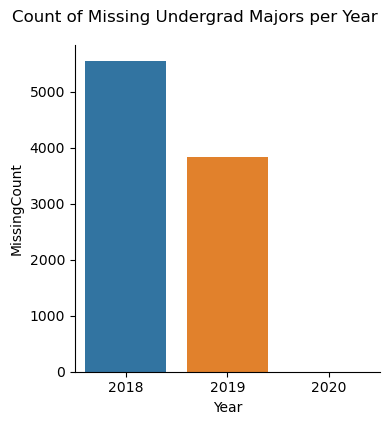

In [82]:
# Calculate Missing Data by Year 
missing_undergrad = (
    stack_overflow_df['UndergradMajor']
    .isnull() # Series of True/False for null values
    .groupby(stack_overflow_df['Year']) # Group by year
    .sum() # Sum of True (equivalent to counting nulls)
    .rename('MissingCount') # Rename the Series itself before resetting the index
    .reset_index() # Convert the Series to A DataFrame with 'Year' as a column
)

sns.catplot(x='Year', y='MissingCount',
           data=missing_undergrad, kind='bar',
           height=4, aspect=1)

plt.suptitle('Count of Missing Undergrad Majors per Year', y='1.05')

missing_undergrad

